In [386]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [387]:
df = pd.read_csv("student_depression_dataset.csv")

In [388]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [389]:
print("Fitur tersedia: ")
i = 1
for col in df.columns:
    print(f"{i} {col}")
    i+=1

Fitur tersedia: 
1 id
2 Gender
3 Age
4 City
5 Profession
6 Academic Pressure
7 Work Pressure
8 CGPA
9 Study Satisfaction
10 Job Satisfaction
11 Sleep Duration
12 Dietary Habits
13 Degree
14 Have you ever had suicidal thoughts ?
15 Work/Study Hours
16 Financial Stress
17 Family History of Mental Illness
18 Depression


## Pra Pemrosesan Pemotongan Fitur

In [390]:
def pra_pemrosesan_pemotongan_fitur(df):
    df_x = df[["Financial Stress", "Have you ever had suicidal thoughts ?", "Academic Pressure","Depression"]]
    return df_x

df_x = pra_pemrosesan_pemotongan_fitur(df)

## Pra Pemrosesan (Pembersihan data)

In [391]:
def check_and_drop_missing_values(df):
    missing_counts = df.isnull().sum()
    total_missing = missing_counts.sum()
    if total_missing == 0:
        print("Dataset tidak memiliki missing value.")
        return df
    else:
        print(f"Dataset memiliki total {total_missing} missing value di kolom-kolom berikut:")
        print(missing_counts[missing_counts > 0])
        df_dropped = df.dropna()
        print(f"Setelah drop, dataset memiliki {df_dropped.shape[0]} baris (dari {df.shape[0]} baris awal).")
        return df_dropped

df_x = check_and_drop_missing_values(df_x) #Drop baris yg ada missing value


def prapemrosesan_drop_nilai_ambigu(df_x):
    df_x = df_x[df_x['Financial Stress'] != '?']
    df_x = df_x[df_x['Academic Pressure'] != 0.0]
    return df_x

df_x = prapemrosesan_drop_nilai_ambigu(df_x) #Drop baris yang memiliki nilai ambigu untuk di diinterpretasikan 


def prapemrosesan_changeto_numerik(df_x):
    df_x['Have you ever had suicidal thoughts ?'] = df_x['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
    return df_x

df_x = prapemrosesan_changeto_numerik(df_x) #Mengubah nilai kategorikal menjadi numerik


Dataset tidak memiliki missing value.


In [392]:
for coloms in df_x.columns:
    print(df_x[coloms].value_counts())

Financial Stress
5.0    6712
4.0    5774
3.0    5222
1.0    5120
2.0    5061
Name: count, dtype: int64
Have you ever had suicidal thoughts ?
1    17650
0    10239
Name: count, dtype: int64
Academic Pressure
3.0    7461
5.0    6296
4.0    5155
1.0    4800
2.0    4177
Name: count, dtype: int64
Depression
1    16331
0    11558
Name: count, dtype: int64


# Drop baris yang memiliki nilai individu

In [393]:
# df_x = df_x[df_x['Financial Stress'] != '?']

# df_x = df_x[df_x['Academic Pressure'] != 0.0]

In [394]:
df_x

,Financial Stress,Have you ever had suicidal thoughts ?,Academic Pressure,Depression
0,1.0,1,5.0,1
1,2.0,0,2.0,0
2,1.0,0,3.0,0
3,5.0,1,3.0,1
4,1.0,1,4.0,0
...,...,...,...,...
27896,1.0,1,5.0,0
27897,3.0,0,2.0,0
27898,2.0,0,3.0,0
27899,5.0,1,5.0,1


In [395]:

# df_x['Have you ever had suicidal thoughts ?'] = df_x['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})


In [396]:
df_x["Depression"].value_counts()

Depression
1    16331
0    11558
Name: count, dtype: int64

In [397]:
df_x.corr()["Depression"]

Financial Stress                         0.363592
Have you ever had suicidal thoughts ?    0.546276
Academic Pressure                        0.475064
Depression                               1.000000
Name: Depression, dtype: float64

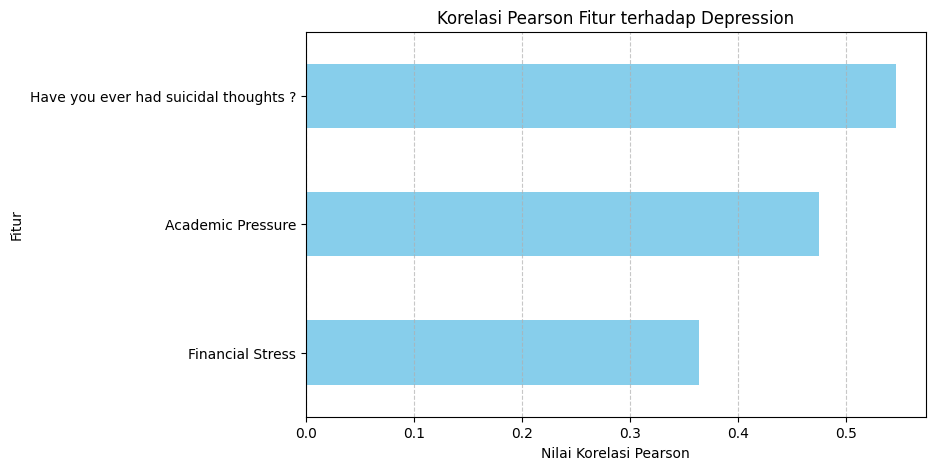

In [398]:
import matplotlib.pyplot as plt
corr = df_x.corr(method='pearson')["Depression"].drop("Depression")

plt.figure(figsize=(8,5))
corr.sort_values().plot(kind='barh', color='skyblue')
plt.title('Korelasi Pearson Fitur terhadap Depression')
plt.xlabel('Nilai Korelasi Pearson')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


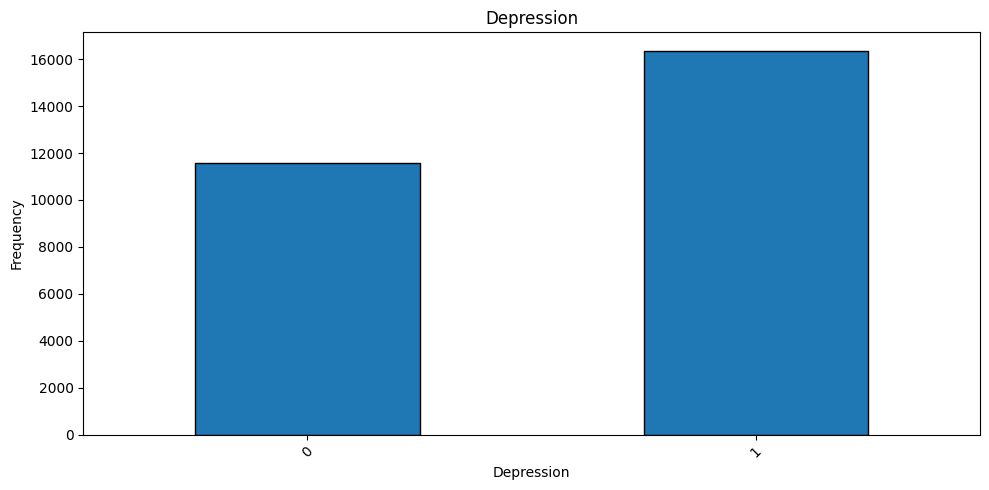

In [399]:
df_x = df_x[df_x['Financial Stress'] != '?']
df_x['Financial Stress'] = pd.to_numeric(df_x['Financial Stress'])
df_x = df_x[df_x['Academic Pressure'] != 0.0]

features = ['Depression']

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    
    if df_x[feature].dtype == 'object' or df_x[feature].nunique() <= 5:
        df_x[feature].value_counts().sort_index().plot(kind='bar', edgecolor='black')
    else:
        df_x[feature].hist(bins=20, edgecolor='black')
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Splitting dan Penentuan Random SEED

In [400]:
RANDOM_SEED = 21 

df_x = df_x.astype(float) 
df_x = df_x.astype(int)

y = df_x["Depression"]
X = df_x.drop("Depression", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y) # membagi data menjadi train dan val dengan ration 70 : 30 
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=RANDOM_SEED, stratify=y_val) #membagi val menjadi val dan test dengan ratio 15:15

# Fuzzy System

In [401]:
suicidal_thoughts = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'suicidal_thoughts')
academic_pressure = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'academic_pressure')
financial_stress = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'financial_stress')
Depression = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Depression')

suicidal_thoughts['no'] = fuzz.trapmf(suicidal_thoughts.universe, [0, 0, 0.4, 0.5])
suicidal_thoughts['yes'] = fuzz.trapmf(suicidal_thoughts.universe, [0.5, 0.6, 1, 1])

academic_pressure['low'] = fuzz.trapmf(academic_pressure.universe, [0, 0, 2.5, 3.5])
academic_pressure['medium'] = fuzz.trimf(academic_pressure.universe, [2.3, 3.5, 4.3])
academic_pressure['high'] = fuzz.trapmf(academic_pressure.universe, [3.5, 4.5, 5, 5])

financial_stress['low'] = fuzz.trapmf(financial_stress.universe, [0, 0, 1.5,2.5])
financial_stress['high'] = fuzz.trapmf(financial_stress.universe, [2.5, 3.5, 5, 5])

Depression['no'] = fuzz.trapmf(Depression.universe, [0, 0,0.3, 0.5])
Depression['yes'] = fuzz.trapmf(Depression.universe, [0.5, 0.7,1, 1])


rules = [
        ctrl.Rule(suicidal_thoughts['no'] & academic_pressure['low'] & financial_stress['low'], Depression['no']),
        ctrl.Rule(suicidal_thoughts['no'] & academic_pressure['low'] & financial_stress['high'], Depression['no']),
        ctrl.Rule(suicidal_thoughts['no'] & academic_pressure['medium'] & financial_stress['low'], Depression['no']),
        ctrl.Rule(suicidal_thoughts['no'] & academic_pressure['medium'] & financial_stress['high'], Depression['yes']),
        ctrl.Rule(suicidal_thoughts['no'] & academic_pressure['high'] & financial_stress['low'], Depression['no']),
        ctrl.Rule(suicidal_thoughts['no'] & academic_pressure['high'] & financial_stress['high'], Depression['yes']),

        ctrl.Rule(suicidal_thoughts['yes'] & academic_pressure['low'] & financial_stress['low'], Depression['no']),
        ctrl.Rule(suicidal_thoughts['yes'] & academic_pressure['low'] & financial_stress['high'], Depression['yes']),
        ctrl.Rule(suicidal_thoughts['yes'] & academic_pressure['medium'] & financial_stress['low'], Depression['yes']),
        ctrl.Rule(suicidal_thoughts['yes'] & academic_pressure['medium'] & financial_stress['high'], Depression['yes']),
        ctrl.Rule(suicidal_thoughts['yes'] & academic_pressure['high'] & financial_stress['low'], Depression['yes']),
        ctrl.Rule(suicidal_thoughts['yes'] & academic_pressure['high'] & financial_stress['high'], Depression['yes'])
]

mental_health_ctrl = ctrl.ControlSystem(rules)
mental_health_sim = ctrl.ControlSystemSimulation(mental_health_ctrl)

def calculate_risk(suicidal, academic, financial):
        mental_health_sim.input['suicidal_thoughts'] = suicidal
        mental_health_sim.input['academic_pressure'] = academic
        mental_health_sim.input['financial_stress'] = financial

        mental_health_sim.compute()

        return mental_health_sim.output['Depression']

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


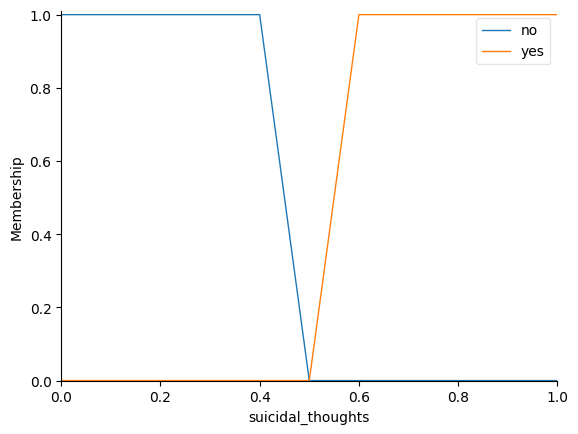

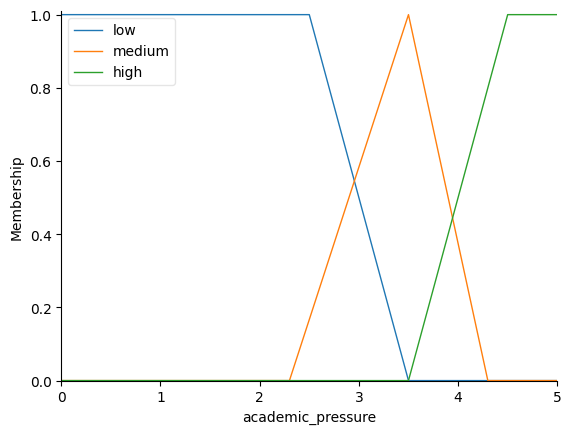

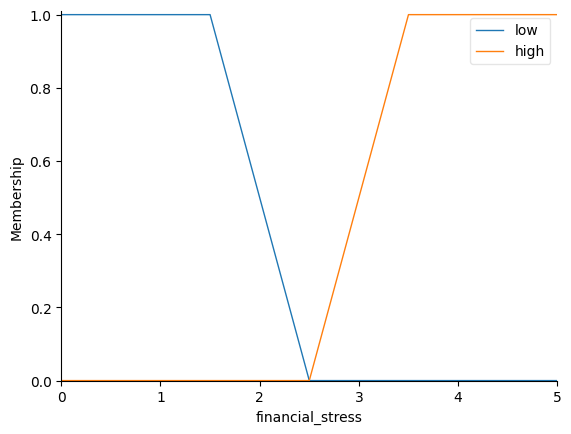

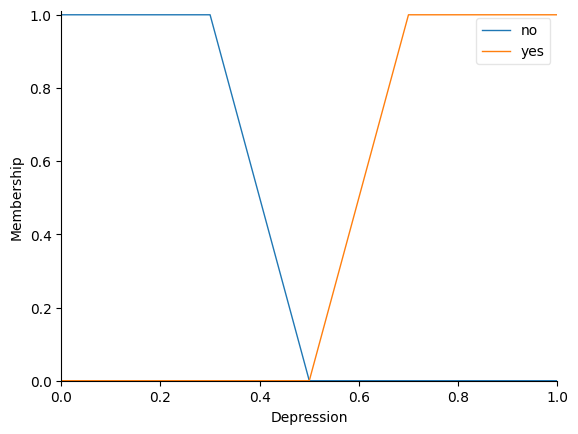

In [402]:
suicidal_thoughts.view()

academic_pressure.view()

financial_stress.view()

Depression.view()

In [403]:
def predict_label(suicidal, academic, financial, threshold=0.5):
    risk = calculate_risk(suicidal, academic, financial)
    
    if risk is None:
        return None  
    return int(risk >= threshold)


In [404]:
y_pred = []

for index, row in X_test.iterrows():
    suicidal = int(float(row["Have you ever had suicidal thoughts ?"]))
    academic = int(float(row["Academic Pressure"]))
    financial = int(float(row["Financial Stress"]))

    y_pred.append(predict_label(suicidal, academic, financial))


In [405]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8119024856596558
0.8083055246570263
0.889795918367347
0.8470953953759471
[[1217  517]
 [ 270 2180]]


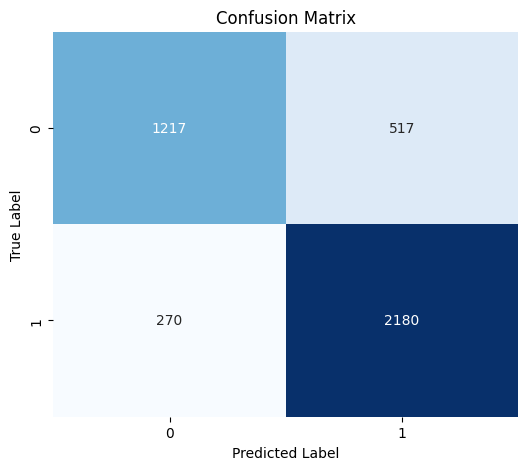

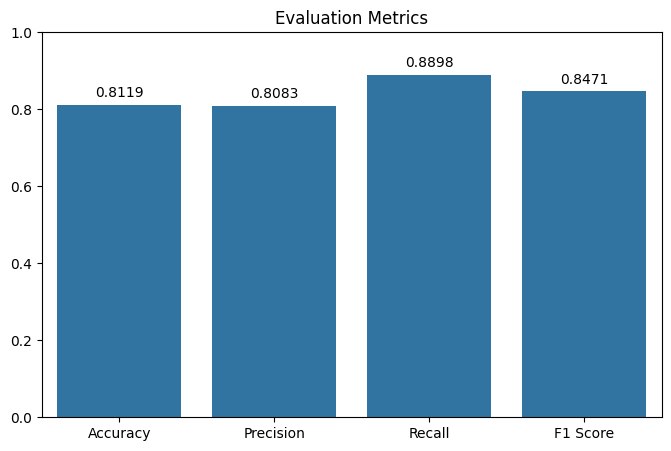

In [406]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8,5))
sns.barplot(x=names, y=values)
plt.ylim(0,1)
plt.title('Evaluation Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
plt.show()


# Supervise Learning

# RANDOM FOREST MODEL

In [407]:
from sklearn.ensemble import RandomForestClassifier

In [408]:
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)

In [409]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=21)

In [410]:
y_pred = rf_model.predict(X_test)

In [411]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8224187380497132
0.8390941597139452
0.8620408163265306
0.8504127239782565
[[1329  405]
 [ 338 2112]]


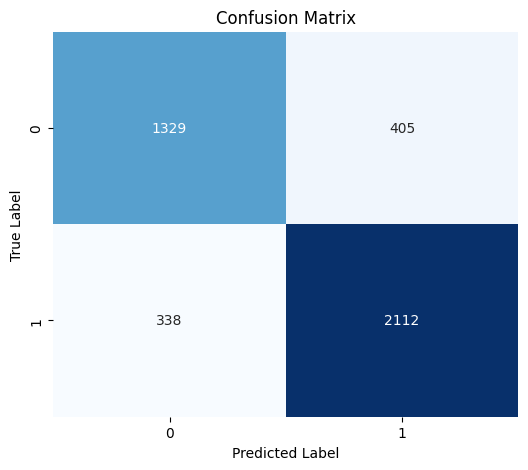

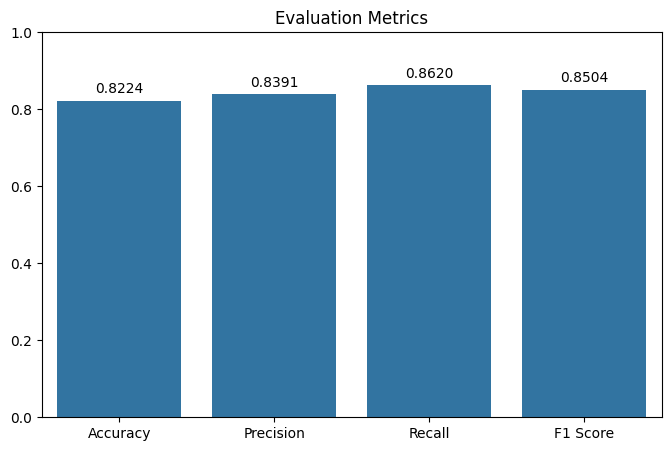

In [412]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8,5))
sns.barplot(x=names, y=values)
plt.ylim(0,1)
plt.title('Evaluation Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
plt.show()
